## <font color="blue">L Cifer-10 dataset and classification by using CNN deep learning .<font>
    
### What is Cifer-10?
    CIFAR-10 is a dataset that consists of 60000 32x32 colour images in 10 classes like
    "airplane","automobile","bird","cat","deer","dog","frog" .etc.
    
### What is CNN?
    CNN stands for Convolutional Neural Network. CNN is a most commonly applied to analyze
    visual imagery like this.

## 1. load dataset.

In [ ]:
from keras.datasets import cifar10

## 2. import libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

## 3. Split the dataset into x_train,y_train,x_test,y_test.

In [ ]:
#load cifer10 dataset and split it.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


## 4. Change train data and test data into float32 and divide by 255.
Your guess is correct, dividing an image by 255 simply rescales the image from 0-255 to 0-1. (Converting it to float from int makes computation convenient too) However, neither is required. When zero-centering the data,the mean The pixel values in a grayscale image are in [0, 255]

In [ ]:
#change train data and test data into float32 and divide by 255
#That normalizes data from 1 to 0. 
x_train = x_train.astype('float32')/255
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')/255


## 5. Convert y_train and y_test into 10 categories

In [ ]:
#convert y_train and y_test into 10 categories
y_train = kr.utils.to_categorical(y_train, 10)
y_test  = kr.utils.to_categorical(y_test,10)

## 6. Let's show images of Cifer-10 images.

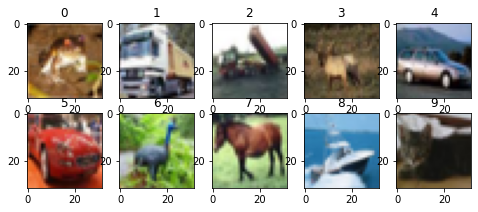

In [ ]:
plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.title(i)
    plt.imshow(x_train[i].reshape(32,32,3))

## 7. Let's build 1st CNN model with Adam optimizer.

In [ ]:
#build 1st model
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

## 8. Let's fit 1st CNN model with Adam optimizer. 

In [ ]:
#model fitting
result1=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 12s 9ms/step - loss: 1.3568 - accuracy: 0.5187
Epoch 2/20
391/391 [==============================] - 3s 9ms/step - loss: 0.9633 - accuracy: 0.6632
Epoch 3/20
391/391 [==============================] - 3s 9ms/step - loss: 0.7914 - accuracy: 0.7252
Epoch 4/20
391/391 [==============================] - 3s 9ms/step - loss: 0.6398 - accuracy: 0.7775
Epoch 5/20
391/391 [==============================] - 3s 9ms/step - loss: 0.4813 - accuracy: 0.8349
Epoch 6/20
391/391 [==============================] - 3s 9ms/step - loss: 0.3300 - accuracy: 0.8899
Epoch 7/20
391/391 [==============================] - 3s 9ms/step - loss: 0.1981 - accuracy: 0.9367
Epoch 8/20
391/391 [==============================] - 3s 9ms/step - loss: 0.1131 - accuracy: 0.9660
Epoch 9/20
391/391 [==============================] - 3s 9ms/step - loss: 0.0627 - accuracy: 0.9830
Epoch 10/20
391/391 [==============================] - 3s 9ms/step - loss: 0.0448 - accuracy: 0.987

## 9. Let's build 2nd CNN model with RMSprop optimizer. 

In [ ]:
#Build 2nd model.
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

## 10. Let's fit 2nd CNN model with RMSprop optimizer. 

In [ ]:
#model fitting
result2=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 1.5410 - accuracy: 0.4535
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.1204 - accuracy: 0.6104
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 0.9476 - accuracy: 0.6703
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 0.8213 - accuracy: 0.7138
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7140 - accuracy: 0.7537
Epoch 6/20
391/391 [==============================] - 4s 11ms/step - loss: 0.6100 - accuracy: 0.7913
Epoch 7/20
391/391 [==============================] - 3s 9ms/step - loss: 0.5089 - accuracy: 0.8249
Epoch 8/20
391/391 [==============================] - 4s 9ms/step - loss: 0.4132 - accuracy: 0.8583
Epoch 9/20
391/391 [==============================] - 3s 8ms/step - loss: 0.3312 - accuracy: 0.8867
Epoch 10/20
391/391 [==============================] - 3s 8ms/step - loss: 0.2522 - accuracy: 0.915

## 11. Evaluate the two models by using two metrics, loss and accuracy.

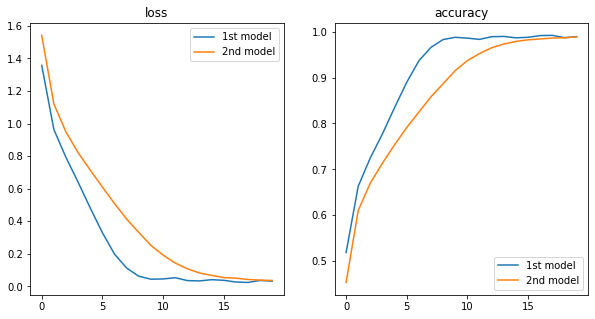

In [ ]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric) 
    plt_result1 = result1.history[metric] 
    plt_result2 = result2.history[metric]
   

    #plot them all
    plt.plot(plt_result1, label='1st model') 
    plt.plot(plt_result2, label='2nd model') 
   
    plt.legend() 
plt.show()

#3rd model usign SGD

In [ ]:
#Build 3rd model.
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1048704   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
#model fitting
result3=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 2.0581 - accuracy: 0.2720
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.8152 - accuracy: 0.3642
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 1.7079 - accuracy: 0.4009
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 1.6252 - accuracy: 0.4276
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 1.5489 - accuracy: 0.4556
Epoch 6/20
391/391 [==============================] - 3s 9ms/step - loss: 1.4830 - accuracy: 0.4760
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 1.4183 - accuracy: 0.5011
Epoch 8/20
391/391 [==============================] - 4s 9ms/step - loss: 1.3590 - accuracy: 0.5209
Epoch 9/20
391/391 [==============================] - 4s 10ms/step - loss: 1.3086 - accuracy: 0.5399
Epoch 10/20
391/391 [==============================] - 4s 9ms/step - loss: 1.2630 - accuracy: 0.558

## 11. Evaluate the two models by using two metrics, loss and accuracy.

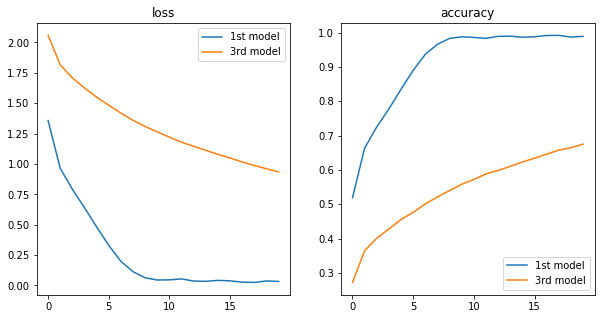

In [ ]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric) 
    plt_result1 = result1.history[metric] 
    plt_result3 = result3.history[metric]
   

    #plot them all
    plt.plot(plt_result1, label='1st model') 
    plt.plot(plt_result3, label='3rd model') 
   
    plt.legend() 
plt.show()

#4th model using Nadam

In [ ]:
#Build 4rd model.
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Nadam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1048704   
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
#model fitting
result4=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 5s 10ms/step - loss: 1.5287 - accuracy: 0.4575
Epoch 2/20
391/391 [==============================] - 4s 9ms/step - loss: 1.1037 - accuracy: 0.6123
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9346 - accuracy: 0.6721
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 0.8234 - accuracy: 0.7134
Epoch 5/20
391/391 [==============================] - 4s 9ms/step - loss: 0.7335 - accuracy: 0.7448
Epoch 6/20
391/391 [==============================] - 4s 9ms/step - loss: 0.6487 - accuracy: 0.7740
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 0.5615 - accuracy: 0.8039
Epoch 8/20
391/391 [==============================] - 4s 9ms/step - loss: 0.4800 - accuracy: 0.8342
Epoch 9/20
391/391 [==============================] - 4s 9ms/step - loss: 0.3998 - accuracy: 0.8635
Epoch 10/20
391/391 [==============================] - 4s 9ms/step - loss: 0.3228 - accuracy: 0.89

#5th model using Adamax

In [ ]:
#Build 5th model.
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adamax',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1048704   
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
#model fitting
result5=model.fit(x_train, y_train,batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 4s 8ms/step - loss: 1.6244 - accuracy: 0.4214
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: 1.2986 - accuracy: 0.5449
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 1.1460 - accuracy: 0.5996
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 1.0438 - accuracy: 0.6359
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.9681 - accuracy: 0.6675
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.9057 - accuracy: 0.6876
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: 0.8529 - accuracy: 0.7061
Epoch 8/20
391/391 [==============================] - 3s 8ms/step - loss: 0.8060 - accuracy: 0.7213
Epoch 9/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7592 - accuracy: 0.7366
Epoch 10/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7214 - accuracy: 0.7511

The 1st model is better.

## 12. How to predict a single photo data?

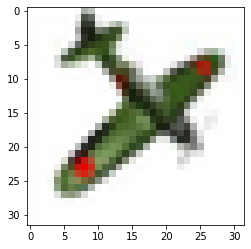

In [ ]:
plt.imshow(x_test[[98]].reshape(32,32,3))

In [ ]:
#Let's predict.
prediction=model.predict(x_test[[98]]) 
prediction

1/1 [==============================] - 0s 132ms/step


array([[1.0000000e+00, 4.5414678e-34, 3.8840263e-08, 5.1630016e-14,
        1.7126353e-21, 7.7899334e-25, 1.4114840e-17, 6.5518670e-21,
        4.7645511e-37, 1.7971388e-32]], dtype=float32)

In [ ]:
names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#Preparation for this predction. 
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in names]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],"!")

The answer is airplane !


<B>"Correct!"<B>